In [69]:
import time

import tensorflow as tf
import pandas as pd

from window import WindowGenerator
import utils

# LSTM

## Datasets

In [70]:
min_temp = 9.08
max_temp = 33.12

In [71]:
case_1 = pd.read_csv("../datasets/case_1.csv", index_col='Time')
case_2 = pd.read_csv("../datasets/case_2.csv", index_col='Time')
case_3 = pd.read_csv("../datasets/case_3.csv", index_col='Time')
case_4 = pd.read_csv("../datasets/case_4.csv", index_col='Time')
case_5 = pd.read_csv("../datasets/case_5.csv", index_col='Time')

In [72]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets[1:]

num_features = len(label_columns)

In [73]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

## Model creation

In [74]:
IN_WIDTH = 18
OUT_STEPS = 18
MAX_EPOCHS = 30
features_size = len(label_columns)

In [75]:
print(f"Using {IN_WIDTH*5//60}min {IN_WIDTH*5 % 60}s of data to predict {OUT_STEPS*5//60}min {IN_WIDTH*5 % 60}s into de future.")

Using 1min 30s of data to predict 1min 30s into de future.


In [76]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

In [77]:
multi_lstm_model.compile(loss=tf.losses.MeanSquaredError(),
                         optimizer=tf.optimizers.Adam(),
                         metrics=[tf.metrics.RootMeanSquaredError()])

In [78]:
exec_times = {}

In [79]:
results = {}

## Case 2

In [80]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_2,
    model=multi_lstm_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_2'] = time.time() - start_t

2022-10-11 11:55:39.848072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-11 11:55:40.027752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-11 11:55:40.129752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-11 11:55:40.605284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-11 11:55:40.673429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [81]:
multi_lstm_model.build(input_shape=window.example[0].shape)
multi_lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                39040     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 2430)              80190     
                                                                 
 reshape_2 (Reshape)         (None, 18, 135)           0         
                                                                 
Total params: 119,230
Trainable params: 119,230
Non-trainable params: 0
_________________________________________________________________


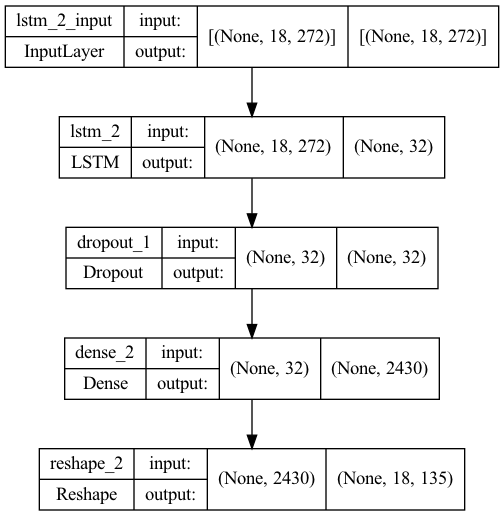

In [82]:
tf.keras.utils.plot_model(multi_lstm_model, "../plots/models/multi_lstm_model.png", show_shapes=True)

label_col_index 134


2022-10-11 11:55:53.500610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-11 11:55:53.556418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


label_col_index 134
label_col_index 134


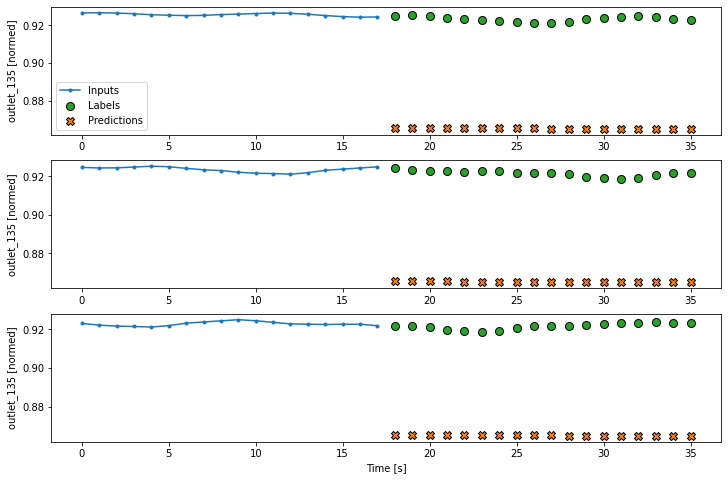

In [83]:
window.plot(multi_lstm_model, plot_col="outlet_135")

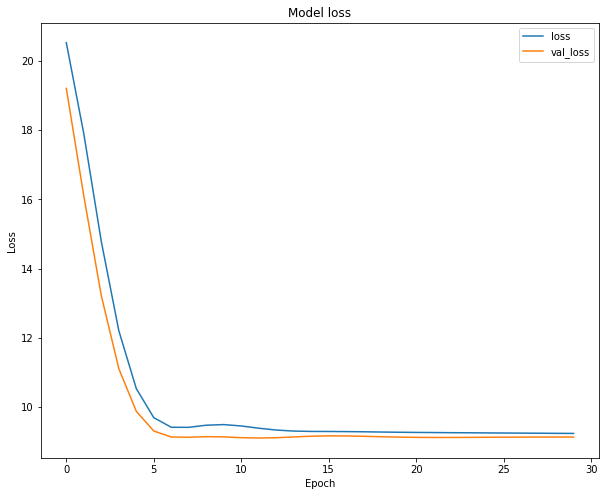

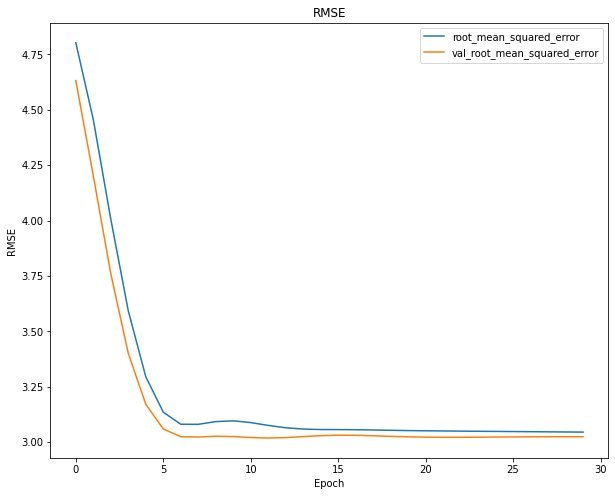

In [84]:
utils.plot_losses(history=history)

In [85]:
results['case_2'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 3

In [86]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_3,
    model=multi_lstm_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_3'] = time.time() - start_t

label_col_index 134
label_col_index 134
label_col_index 134


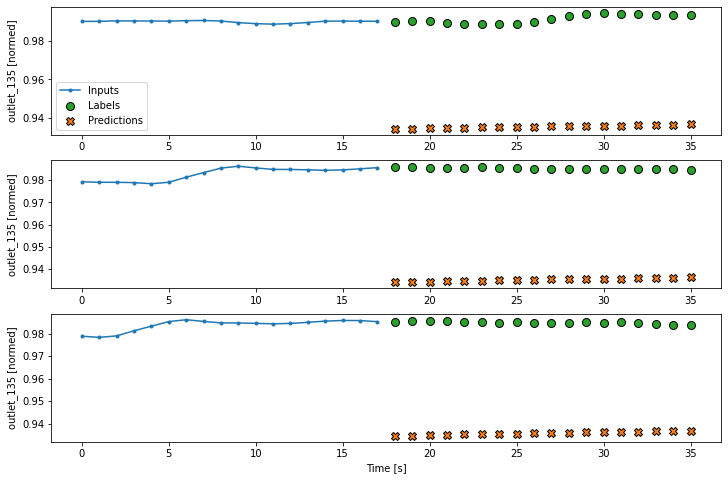

In [87]:
window.plot(multi_lstm_model, plot_col="outlet_135")

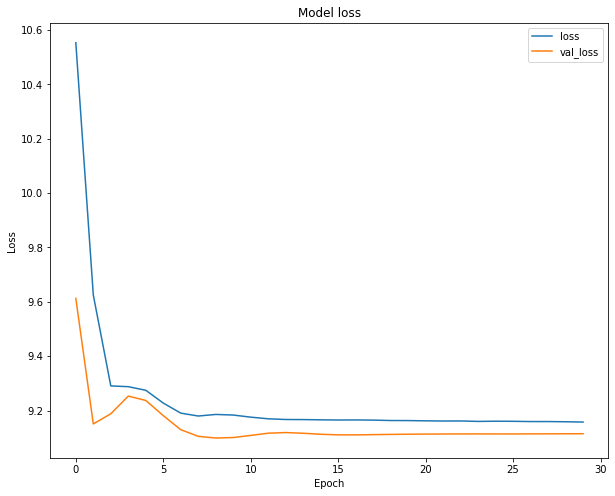

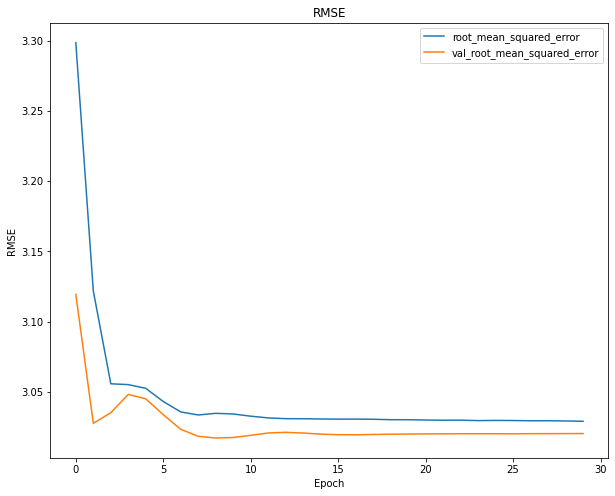

In [88]:
utils.plot_losses(history=history)

In [89]:
results['case_3'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 4

In [90]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_4,
    model=multi_lstm_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_4'] = time.time() - start_t

label_col_index 134
label_col_index 134
label_col_index 134


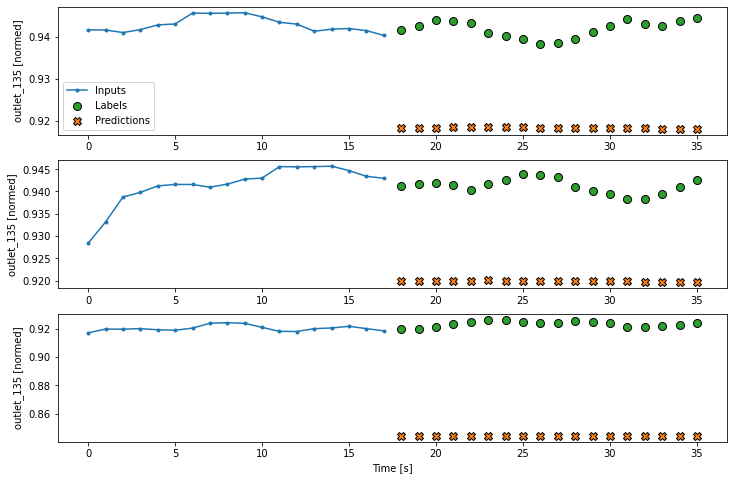

In [91]:
window.plot(multi_lstm_model, plot_col="outlet_135")

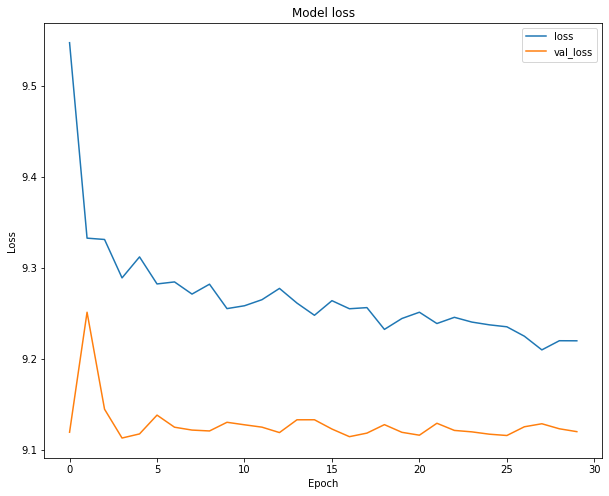

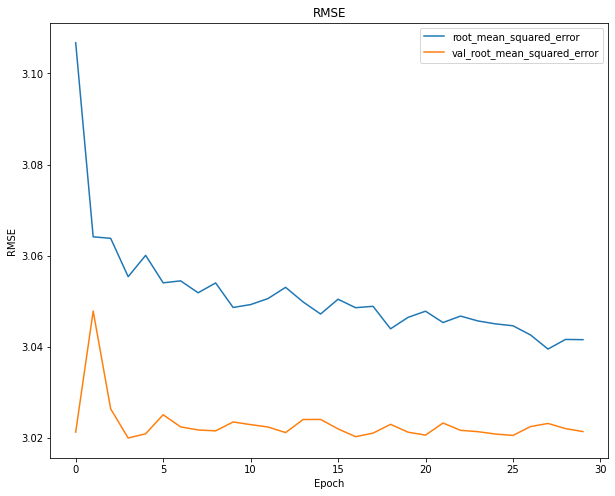

In [92]:
utils.plot_losses(history=history)

In [93]:
results['case_4'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 5

In [94]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_5,
    model=multi_lstm_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_5'] = time.time() - start_t

label_col_index 134
label_col_index 134
label_col_index 134


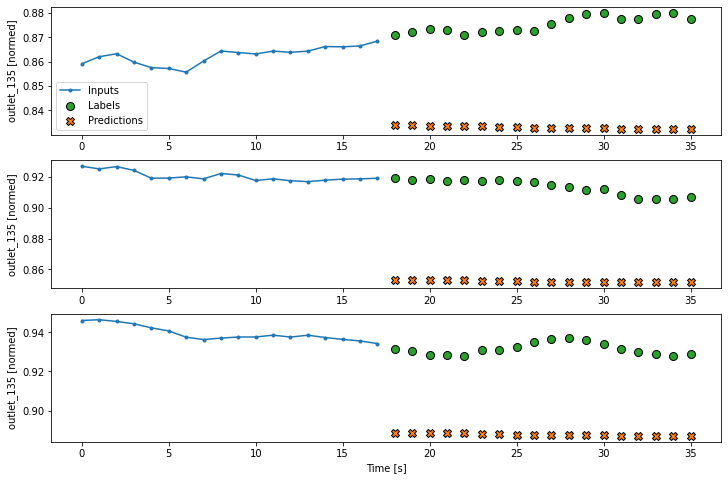

In [95]:
window.plot(multi_lstm_model, plot_col="outlet_135")

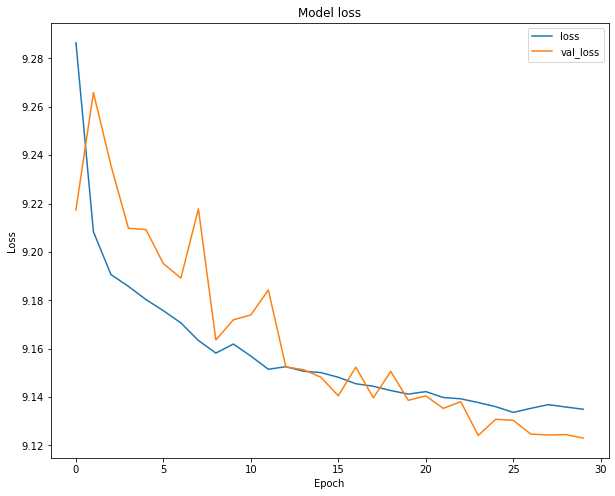

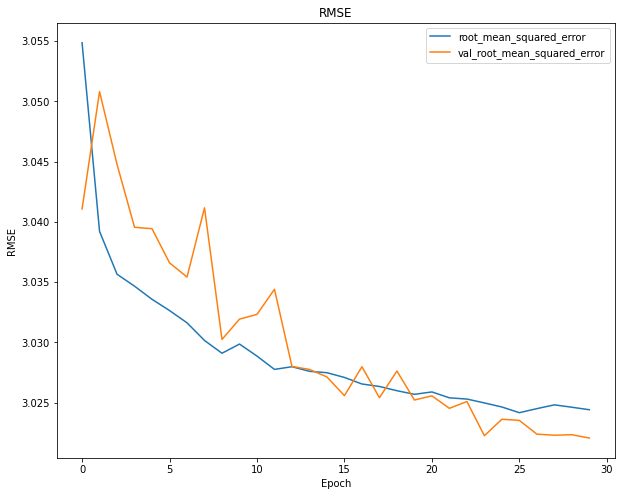

In [96]:
utils.plot_losses(history=history)

In [97]:
results['case_5'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 1 (Testing)

In [98]:
window = WindowGenerator(
    train_df=case_1,
    input_width=IN_WIDTH,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    label_columns=label_columns
)

test_res = multi_lstm_model.evaluate(window.train)

5/5 [==============================] - 0s 13ms/step - loss: 0.0232 - root_mean_squared_error: 0.1684


In [99]:
results['test'] = {
    'loss': utils.inverse_transform_loss(test_res[0]),
    'rmse': utils.inverse_transform_rmse(test_res[1])
}

In [100]:
pd.DataFrame(results).transpose().round(2)

,loss,rmse,val_loss,val_rmse
case_2,9.24,3.04,9.13,3.02
case_3,9.16,3.03,9.11,3.02
case_4,9.22,3.04,9.12,3.02
case_5,9.13,3.02,9.12,3.02
test,9.64,3.12,NaN,NaN


In [101]:
exec_times_df = pd.DataFrame().from_dict(exec_times, orient='index', columns=['Time'])
exec_times_df.round(2)

,Time
case_2,14.29
case_3,13.18
case_4,15.34
case_5,18.62


In [102]:
print("Total training time: %.2fs" % exec_times_df['Time'].sum())

Total training time: 61.43s
